In [1]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
import os
import numpy as np
import string

In [6]:
# Onehot key for every word
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {} #Save the index in all samples
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_length = 10 # Only consider the first 10 words in every smaple
results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] = 1

In [49]:
# Onehot key for every character
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip( characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples),
                    max_length,
                    len(characters) + 1)) #max(token_index.keys()) + 1
for i , smaple in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1

In [54]:
# Use keras to imply word`s one-hotkey
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
# We may get one-hot binary way of representation this may alse get other vectorize methods
word_index = tokenizer.word_index
print('Found %s unique tokens.' %len(word_index)) 

Found 9 unique tokens.


In [55]:
# Embedding layer for word embedding
from keras.layers import Embedding

embedding_layer = Embedding(1000,64)
# Embedding layer has at least 2 parameters: the numbers that are signature, here is 1000 which is the max word 
# index maximium +1 and embedd dimension which here is 64
# Embedding layer is like a layer with dictionary and finding

In [57]:
# IMDB datasets training
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [62]:
max_features = 10000 # as a feature`s words number
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)
# Pads sequences to the same length. which mean cut the unnecessary thing and add the to the

In [64]:
model = Sequential()
model.add(Embedding(1000, 8, input_length=maxlen))

model.add(Flatten()) #flatten the embedding tensor layer into (samples, maxlen * 8) this two layer

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             8000      
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size =32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 81us/step - loss: 0.6767 - acc: 0.6026 - val_loss: 0.6427 - val_acc: 0.6696
Epoch 2/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.5796 - acc: 0.7205 - val_loss: 0.5606 - val_acc: 0.7094
Epoch 3/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.5128 - acc: 0.7469 - val_loss: 0.5355 - val_acc: 0.7220
Epoch 4/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.4868 - acc: 0.7621 - val_loss: 0.5302 - val_acc: 0.7270
Epoch 5/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.4728 - acc: 0.7699 - val_loss: 0.5292 - val_acc: 0.7344
Epoch 6/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.4635 - acc: 0.7763 - val_loss: 0.5323 - val_acc: 0.7328
Epoch 7/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.4553 - acc: 0.7817 - val_loss: 0.5337 - val_acc:

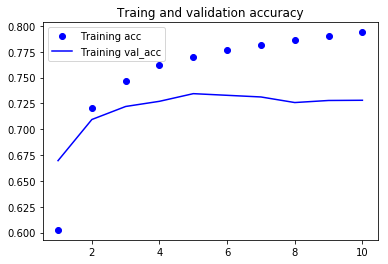

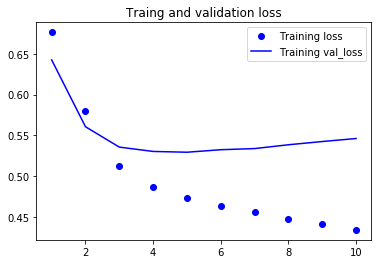

In [76]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 11)
plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label='Training val_acc')
plt.title('Traing and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label='Training val_loss')
plt.title('Traing and validation loss')
plt.legend()

plt.show()

In [4]:
# A more complete imdb training with GloVe
# GloVe, global vectors for word representation is a pre-trained vector which have better representation
# It has download before
# imbd_dir = '/home/james/Program/KerasLearning/data/aclImbd'

imbd_dir = '/home/james/Program/KerasLearning/data/aclImbd'
train_dir = os.path.join(imbd_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [10]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
# fit_on_texts is tokenizer`s parameter ,texts: list of texts to train on.
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('word_index type:', type(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indicies)
data = data[indicies]
label = label[indicies]
 
x_train = data[:training_samples]
y_train = label[:train_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

SyntaxError: invalid syntax (<ipython-input-10-75c030b80eb2>, line 13)

In [11]:
np.asarray?